In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
ds=pd.read_csv('role_website.csv')

In [5]:
ds

,role,website
0,teacher,linkedin
1,teacher,linkedin
2,student,facebook
3,student,facebook
4,teacher,linkedin
5,student,facebook
6,student,facebook
7,teacher,linkedin
8,teacher,linkedin
9,teacher,facebook


In [7]:
df=pd.DataFrame(ds)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   role     34 non-null     object
 1   website  34 non-null     object
dtypes: object(2)
memory usage: 672.0+ bytes


In [9]:
df.dtypes

role       object
website    object
dtype: object

In [10]:
df.describe()

,role,website
count,34,34
unique,2,2
top,teacher,linkedin
freq,21,18


In [11]:
df_crosstab=pd.crosstab(df['role'],df['website'],margins=True)
df_crosstab

website,facebook,linkedin,All
role,,,
student,10,3,13
teacher,6,15,21
All,16,18,34


In [8]:
df_crosstab.columns=['facebook','linkedin','row_total']
df_crosstab.index=['student','teacher','col_total']
df_crosstab

,facebook,linkedin,row_total
student,10,3,13
teacher,6,15,21
col_total,16,18,34


In [10]:
observed=df_crosstab.iloc[0:2,0:2]
observed

,facebook,linkedin
student,10,3
teacher,6,15


In [13]:
import scipy.stats as st
crit=st.chi2.ppf(q=.95,df=1)
crit

3.841458820694124

In [ ]:
#since chi2 7.53 > crit 3.84 hence Null hypothesis is rejected 

In [13]:
chi2,p,dof,expected=stats.chi2_contingency(observed=observed)

In [15]:
print('chi-square test',chi2)
print('p = ',p)
print('dof value = ',dof)
print('expected =',expected)

chi-square test 5.718991656491658
p =  0.01678236577734386
dof value =  1
expected = [[ 6.11764706  6.88235294]
 [ 9.88235294 11.11764706]]


In [16]:
#since value of p is 0.01 which is less than 0.05 hence H0 is rejected and HA is accepted

In [17]:
#And the variables are dependent

In [22]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib 
import matplotlib.pyplot as plt
df=pd.read_csv('president_heights.csv')

In [23]:
df

,order,name,height
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [25]:
df.columns

Index(['order', 'name', 'height'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad1ce4fa90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad1d50c130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad1ce4f640>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad1d50c850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad1d50cbe0>],
 'means': []}

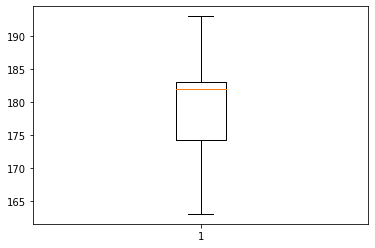

In [24]:
plt.boxplot(df['height'])

In [34]:
df['height'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    163.0
0.1    170.1
0.2    173.0
0.3    175.6
0.4    178.0
0.5    182.0
0.6    183.0
0.7    183.0
0.8    185.0
0.9    188.0
1.0    193.0
Name: height, dtype: float64

In [36]:
df3=pd.read_csv('brain_size.csv',sep=';',na_values=".")

In [37]:
df3

,id,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


{'whiskers': [<matplotlib.lines.Line2D at 0x1af35bee7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1af35beef10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af35bee460>],
 'medians': [<matplotlib.lines.Line2D at 0x1af35bfa670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af35bfaa00>],
 'means': []}

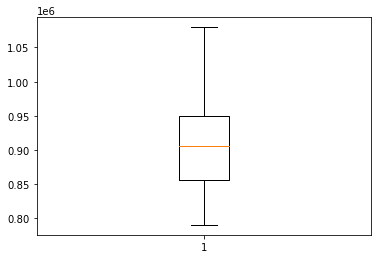

In [39]:
plt.boxplot(df3['MRI_Count'])

In [ ]:
df3=pd.read_csv('brain_size.csv',sep=';',na_values=".")

In [31]:
df4=pd.read_csv('titanic_train.csv')

In [32]:
df4.columns
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


{'whiskers': [<matplotlib.lines.Line2D at 0x1ad1d91f7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad1d91ff10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad1d91f430>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad1d92a670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad1d92aa00>],
 'means': []}

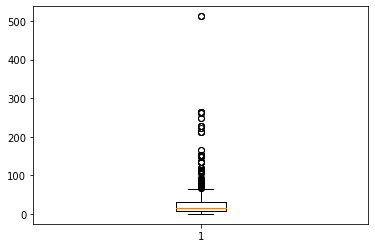

In [35]:
#plt.boxplot(df4.Fare)
plt.boxplot(df4['Fare'])

In [36]:
import seaborn as sns

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

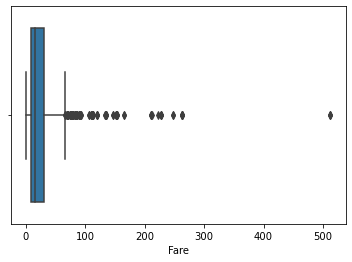

In [37]:
sns.boxplot(df4['Fare'])

In [15]:
from scipy.stats import f_oneway

In [13]:
marks_SecA=[10,30,45,67]
marks_SecB=[50,30,75,67]
marks_SecC=[20,40,55,60]

In [16]:
f_oneway(marks_SecA,marks_SecB,marks_SecC)

F_onewayResult(statistic=0.7344701583434836, pvalue=0.5064412066974056)

In [11]:
a=[10,30,45,6997]
b=[50,30,75,67]
c=[26666660,40,77777755,6666660]

In [17]:
f_oneway(a,b,c)

F_onewayResult(statistic=2.48987912984777, pvalue=0.13782970142454057)

In [18]:
dfa=pd.DataFrame(a)
dfb=pd.DataFrame(b)
dfc=pd.DataFrame(c)

In [19]:
print(dfa.mean())
print(dfb.mean())
print(dfc.mean())


0    1770.5
dtype: float64
0    55.5
dtype: float64
0    27777778.75
dtype: float64


In [39]:
hf=pd.read_csv('house_price_data_median.csv')

In [40]:
hf.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1ad1dc81670>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad1dc81d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad1dc812e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad1dc914f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad1dc91880>],
 'means': []}

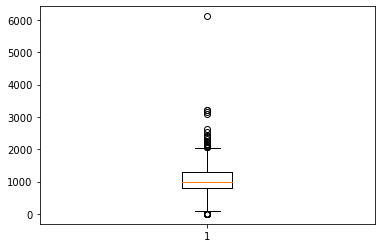

In [41]:
plt.boxplot(hf.TotalBsmtSF)

In [42]:
from scipy.stats import zscore
import numpy as np

In [45]:
z=np.abs(zscore(hf)) #numpy.abs method gives absolute values means only positive values

In [46]:
z

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,0.207142,0.651479,0.517200,0.459303,0.789741,1.227585,0.163779,0.912210,0.951226,0.351000,1.002743
1,0.091886,0.071836,2.179628,0.466465,0.789741,0.761621,0.163779,0.318683,0.600495,0.060731,1.002743
2,0.073480,0.651479,0.517200,0.313369,0.789741,1.227585,0.163779,0.318683,0.600495,0.631726,1.002743
3,0.096897,0.651479,0.517200,0.687324,1.026041,0.761621,0.163779,0.296763,0.600495,0.790804,0.997264
4,0.375148,1.374795,0.517200,0.199680,0.789741,1.227585,1.390023,1.527656,0.600495,1.698485,1.002743
...,...,...,...,...,...,...,...,...,...,...,...
1455,0.260560,0.071836,0.517200,0.238122,0.789741,1.227585,0.163779,0.296763,0.600495,0.060731,1.002743
1456,0.266407,0.071836,0.381743,1.104925,0.789741,0.761621,0.163779,0.296763,2.152216,0.126420,1.002743
1457,0.147810,0.651479,3.078570,0.215641,0.789741,0.761621,1.390023,1.527656,2.152216,1.033914,1.002743
1458,0.080160,0.795151,0.381743,0.046905,1.026041,0.761621,1.062465,0.934130,0.951226,1.090059,0.997264


In [50]:
threshhold=3
print(np.where(z>3))

(array([  53,   53,   88,  144,  166,  178,  185,  185,  188,  189,  191,
        218,  224,  241,  249,  250,  291,  298,  304,  309,  313,  330,
        332,  335,  375,  375,  378,  384,  398,  440,  451,  457,  461,
        496,  508,  519,  523,  533,  570,  581,  583,  597,  605,  624,
        628,  634,  635,  635,  642,  661,  664,  676,  691,  703,  706,
        726,  745,  769,  769,  803,  825,  843,  848,  897,  897,  910,
        921,  980,  991, 1031, 1044, 1061, 1123, 1149, 1154, 1163, 1163,
       1173, 1182, 1190, 1213, 1213, 1230, 1230, 1268, 1270, 1283, 1298,
       1298, 1298, 1298, 1298, 1327, 1350, 1350, 1350, 1352, 1373, 1386,
       1396, 1435, 1450, 1457], dtype=int64), array([0, 6, 2, 6, 8, 9, 2, 7, 5, 6, 2, 2, 3, 2, 0, 2, 6, 5, 2, 8, 0, 6,
       3, 0, 1, 2, 2, 0, 2, 3, 0, 0, 2, 3, 2, 2, 3, 1, 6, 9, 2, 5, 8, 5,
       5, 6, 6, 7, 8, 0, 9, 2, 3, 2, 0, 2, 2, 0, 7, 7, 9, 6, 0, 6, 7, 7,
       5, 2, 2, 7, 3, 9, 2, 2, 5, 5, 6, 7, 3, 9, 2, 6, 5, 7, 2, 6, 5, 0,
    

In [79]:
zfd=pd.DataFrame(z)
zfd.iloc[53:54,3:4]

,TotalBsmtSF
53,1.78899


In [54]:
q1=hf.quantile(0.25)
q3=hf.quantile(0.75)

In [55]:
q1

LotArea             7553.50
OverallQual            5.00
OverallCond            5.00
TotalBsmtSF          795.75
FullBath               1.00
HalfBath               0.00
BedroomAbvGr           2.00
TotRmsAbvGrd           5.00
Fireplaces             0.00
GarageArea           334.50
AboveMedianPrice       0.00
Name: 0.25, dtype: float64

In [56]:
iqr=q3-q1
iqr

LotArea             4048.0
OverallQual            2.0
OverallCond            1.0
TotalBsmtSF          502.5
FullBath               1.0
HalfBath               1.0
BedroomAbvGr           1.0
TotRmsAbvGrd           2.0
Fireplaces             1.0
GarageArea           241.5
AboveMedianPrice       1.0
dtype: float64

In [58]:
hf_new=hf[(z<3).all(axis=1)]

In [59]:
hf_new

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1454,7500,7,5,1221,2,0,2,6,0,400,1
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [61]:
hf_out=hf[(z>3).all(axis=1)]
print(hf_out)

Empty DataFrame
Columns: [LotArea, OverallQual, OverallCond, TotalBsmtSF, FullBath, HalfBath, BedroomAbvGr, TotRmsAbvGrd, Fireplaces, GarageArea, AboveMedianPrice]
Index: []


In [62]:
hf_out

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice


In [63]:
hf.shape

(1460, 11)

In [64]:
hf_new.shape

(1372, 11)

In [65]:
hf_out.shape

(0, 11)

In [80]:
z[144][6]

KeyError: 144